In [1]:
pwd

'/Users/surajpawar/Desktop/Recurrent Neural Networks'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub

2023-08-05 18:11:23.937600: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


ModuleNotFoundError: No module named 'tensorflow_hub'

In [3]:
pip install tensorflow_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.3/90.3 kB 1.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub

In [5]:
df = pd.read_csv("/Users/surajpawar/Desktop/Recurrent Neural Networks/wine-reviews.csv")

In [6]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [7]:
df = pd.read_csv("/Users/surajpawar/Desktop/Recurrent Neural Networks/wine-reviews.csv", usecols = ['country', 'description', 'points', 'price', 'variety', 'winery'])
df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


In [8]:
df = df.dropna(subset=["description", "points"])
df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


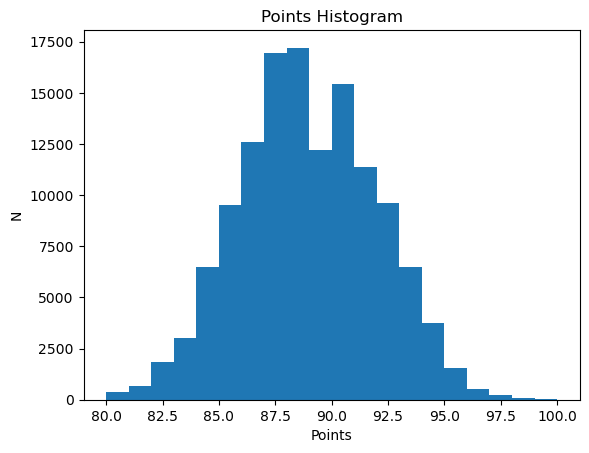

In [9]:
plt.hist(df.points, bins = 20)
plt.title("Points Histogram")
plt.ylabel("N")
plt.xlabel("Points")
plt.show()

In [10]:
df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


In [11]:
df["label"] = (df.points >= 90).astype(int)
df = df[["description", "points", "label"]]

In [12]:
df.head()

,description,points,label
0,"Aromas include tropical fruit, broom, brimston...",87,0
1,"This is ripe and fruity, a wine that is smooth...",87,0
2,"Tart and snappy, the flavors of lime flesh and...",87,0
3,"Pineapple rind, lemon pith and orange blossom ...",87,0
4,"Much like the regular bottling from 2012, this...",87,0


In [13]:
df.tail()

,description,points,label
129966,Notes of honeysuckle and cantaloupe sweeten th...,90,1
129967,Citation is given as much as a decade of bottl...,90,1
129968,Well-drained gravel soil gives this wine its c...,90,1
129969,"A dry style of Pinot Gris, this is crisp with ...",90,1
129970,"Big, rich and off-dry, this is powered by inte...",90,1


In [14]:
df["label"] = (df.points >= 90).astype(int)
df = df[["description", "label"]]

In [15]:
df.head()

,description,label
0,"Aromas include tropical fruit, broom, brimston...",0
1,"This is ripe and fruity, a wine that is smooth...",0
2,"Tart and snappy, the flavors of lime flesh and...",0
3,"Pineapple rind, lemon pith and orange blossom ...",0
4,"Much like the regular bottling from 2012, this...",0


In [18]:
train, val, test = np.split(df.sample(frac=1), [int(0.8*len(df)), int(0.9*len(df))])

In [19]:
len(train), len(val), len(test)

(103976, 12997, 12998)

In [20]:
def df_to_dataset(dataframe, shuffle=True, batch_size=1024):
  df = dataframe.copy()
  labels = df.pop('label')
  df = df["description"]
  ds = tf.data.Dataset.from_tensor_slices((df, labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(tf.data.AUTOTUNE)
  return ds

In [21]:
train_data = df_to_dataset(train)
valid_data = df_to_dataset(val)
test_data = df_to_dataset(test)

In [22]:
list(train_data)[0]

2023-08-05 18:37:04.136909: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [103976]
	 [[{{node Placeholder/_1}}]]
2023-08-05 18:37:04.137468: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [103976]
	 [[{{node Placeholder/_1}}]]


(<tf.Tensor: shape=(1024,), dtype=string, numpy=
 array([b"This impressive dry wine is made as part of a club of producers who taste and evaluate each other's wines before release. A blend of 60% Pinot Noir and 40% Chardonnay, it is full of white fruit with a toasty edge that gives the wine weight. Behind this is a strongly mineral character with bite and zest that will allow it age further. Drink from 2020.",
        b'An unusually rich wine for Sancerre, this is packed with apple and pear fruits, with a soft touch of honey to fill out the palate. It is ripe, full of fruit and immediately drinkable, soft at the end while still fresh.',
        b'Virtually identical with Pinot Noir, and quite a good one at that. Shows cool-climate influence in the translucent color, vital acidity and pure flavors of raspberries and persimmons, accented with smoky oak.',
        ...,
        b'Black tea, charred cherries and tree bark aromas arise off this wine from a cooler part of a warm appellation. 

In [23]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, dtype = tf.string, trainable = True)

In [24]:
hub_layer(list(train_data)[0][0])

2023-08-05 18:41:27.625568: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'sentences' with dtype string and shape [?]
	 [[{{node sentences}}]]


<tf.Tensor: shape=(1024, 50), dtype=float32, numpy=
array([[ 0.5515615 , -0.2151569 ,  0.1304091 , ...,  0.0205241 ,
        -0.06926403,  0.03677253],
       [ 0.35781965, -0.22567908, -0.10572686, ...,  0.17798671,
        -0.18581615, -0.02990135],
       [ 0.12665597, -0.38874483, -0.26472318, ...,  0.01025924,
        -0.15607144,  0.14700246],
       ...,
       [ 0.2703331 , -0.23129024,  0.0329665 , ..., -0.18494236,
        -0.21790697,  0.01455361],
       [ 0.40129238, -0.33358195, -0.09058923, ..., -0.16507426,
         0.03016813,  0.14030927],
       [ 0.32240373, -0.16523127, -0.12124496, ..., -0.03730007,
         0.05824258, -0.132161  ]], dtype=float32)>

In [25]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation = 'relu'))
model.add(tf.keras.layers.Dense(16, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [27]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
             loss = tf.keras.losses.BinaryCrossentropy(),
             metrics = ['accuracy']
             )

In [29]:
model.evaluate(train_data)

2023-08-05 18:47:46.425415: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder' with dtype string and shape [?]
	 [[{{node Placeholder}}]]


102/102 [==============================] - 2s 7ms/step - loss: 0.7015 - accuracy: 0.4143


[0.7014970779418945, 0.4142782986164093]

In [30]:
model.evaluate(valid_data)

13/13 [==============================] - 0s 7ms/step - loss: 0.7009 - accuracy: 0.4215


2023-08-05 18:48:01.413263: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [12997]
	 [[{{node Placeholder/_0}}]]
2023-08-05 18:48:01.413742: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [12997]
	 [[{{node Placeholder/_0}}]]


[0.7009431719779968, 0.4214818775653839]

In [31]:
history = model.fit(train_data, epochs = 10, validation_data = valid_data)

Epoch 1/10


2023-08-05 18:49:26.306983: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall' with dtype float and shape [?,50]
	 [[{{node gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall}}]]
2023-08-05 18:49:26.307119: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_3' with dtype int64 and shape [?]
	 [[{{node gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_3}}]]


102/102 [==============================] - 78s 757ms/step - loss: 0.6002 - accuracy: 0.6790 - val_loss: 0.4598 - val_accuracy: 0.7835
Epoch 2/10
102/102 [==============================] - 85s 833ms/step - loss: 0.3891 - accuracy: 0.8219 - val_loss: 0.3947 - val_accuracy: 0.8152
Epoch 3/10
102/102 [==============================] - 98s 957ms/step - loss: 0.3387 - accuracy: 0.8488 - val_loss: 0.3863 - val_accuracy: 0.8213
Epoch 4/10
102/102 [==============================] - 91s 894ms/step - loss: 0.3130 - accuracy: 0.8618 - val_loss: 0.3880 - val_accuracy: 0.8237
Epoch 5/10
102/102 [==============================] - 86s 847ms/step - loss: 0.2939 - accuracy: 0.8716 - val_loss: 0.3892 - val_accuracy: 0.8229
Epoch 6/10
102/102 [==============================] - 86s 843ms/step - loss: 0.2776 - accuracy: 0.8804 - val_loss: 0.3934 - val_accuracy: 0.8216
Epoch 7/10
102/102 [==============================] - 92s 899ms/step - loss: 0.2625 - accuracy: 0.8880 - val_loss: 0.4020 - val_accuracy: 0.8

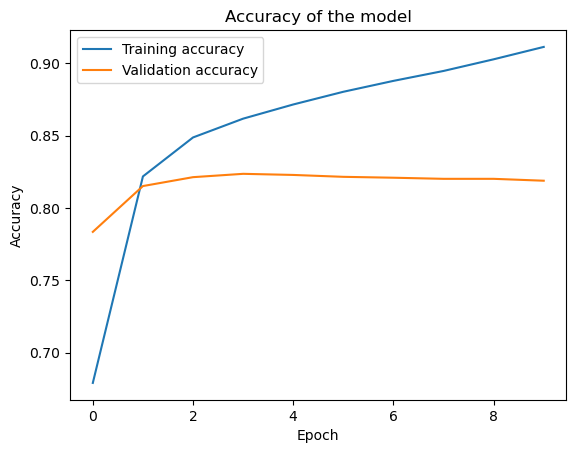

In [32]:
plt.plot(history.history["accuracy"], label = "Training accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation accuracy")
plt.title("Accuracy of the model")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

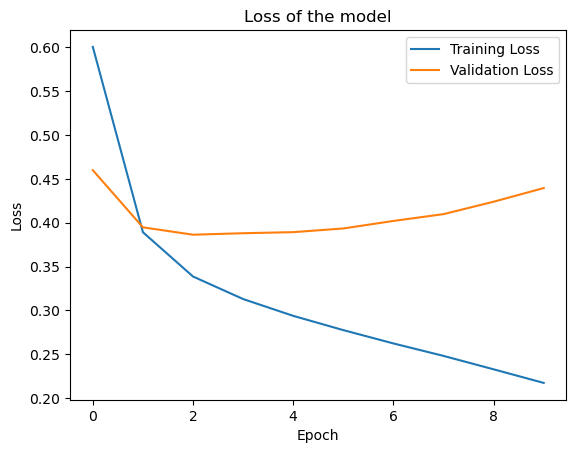

In [33]:
plt.plot(history.history["loss"], label = "Training Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.title("Loss of the model")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [34]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, dtype = tf.string, trainable = True)

In [35]:
hub_layer(list(train_data)[0][0])

2023-08-05 19:05:53.007463: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'sentences' with dtype string and shape [?]
	 [[{{node sentences}}]]


<tf.Tensor: shape=(1024, 50), dtype=float32, numpy=
array([[ 0.36452496, -0.18935001, -0.06093408, ..., -0.20027545,
        -0.09198105,  0.0033259 ],
       [ 0.42822942, -0.37044427, -0.10570195, ..., -0.05741052,
         0.04042688,  0.11871015],
       [ 0.4702341 , -0.20170161,  0.27858725, ..., -0.06548087,
        -0.03388098,  0.07080733],
       ...,
       [ 0.06744029,  0.1166944 , -0.03406285, ..., -0.08687284,
        -0.30146804,  0.19822183],
       [ 0.08517247, -0.07602288, -0.24016242, ..., -0.03486912,
        -0.19962049,  0.00124216],
       [ 0.4736105 ,  0.06955958,  0.15069625, ..., -0.13716674,
        -0.2293535 ,  0.08565757]], dtype=float32)>

In [36]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(16, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [37]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
             loss = tf.keras.losses.BinaryCrossentropy(),
             metrics = ['accuracy']
             )

In [39]:
model.evaluate(train_data)

102/102 [==============================] - 1s 7ms/step - loss: 0.6799 - accuracy: 0.6097


[0.6798726916313171, 0.6097368597984314]

In [38]:
model.evaluate(valid_data)

2023-08-05 19:06:21.648019: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder' with dtype string and shape [?]
	 [[{{node Placeholder}}]]


13/13 [==============================] - 1s 7ms/step - loss: 0.6798 - accuracy: 0.6091


[0.679766833782196, 0.6090636253356934]

In [40]:
history = model.fit(train_data, epochs = 5, validation_data = valid_data)

Epoch 1/5


2023-08-05 19:06:57.930285: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall' with dtype float and shape [?,50]
	 [[{{node gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall}}]]
2023-08-05 19:06:57.930376: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_3' with dtype int64 and shape [?]
	 [[{{node gradients/StatefulPartitionedCall_grad/StatefulPartitionedCall_3}}]]


102/102 [==============================] - 84s 811ms/step - loss: 0.6139 - accuracy: 0.6609 - val_loss: 0.4843 - val_accuracy: 0.7759
Epoch 2/5
102/102 [==============================] - 131s 1s/step - loss: 0.4573 - accuracy: 0.7941 - val_loss: 0.4057 - val_accuracy: 0.8093
Epoch 3/5
102/102 [==============================] - 98s 959ms/step - loss: 0.3959 - accuracy: 0.8299 - val_loss: 0.3900 - val_accuracy: 0.8190
Epoch 4/5
102/102 [==============================] - 89s 868ms/step - loss: 0.3625 - accuracy: 0.8468 - val_loss: 0.3903 - val_accuracy: 0.8233
Epoch 5/5
102/102 [==============================] - 88s 860ms/step - loss: 0.3390 - accuracy: 0.8576 - val_loss: 0.3877 - val_accuracy: 0.8259


In [41]:
model.evaluate(test_data)

 1/13 [=>............................] - ETA: 1s - loss: 0.3872 - accuracy: 0.8281

2023-08-05 19:16:18.741787: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [12998]
	 [[{{node Placeholder/_1}}]]
2023-08-05 19:16:18.742279: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [12998]
	 [[{{node Placeholder/_0}}]]


13/13 [==============================] - 2s 116ms/step - loss: 0.3745 - accuracy: 0.8306


[0.37446269392967224, 0.8305892944335938]